In [1]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [4]:
df=pd.read_csv("Automobile_insurance_fraud.csv")

In [5]:
df

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,...,?,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,...,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,...,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,...,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN


In [6]:
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [7]:
df.dtypes

months_as_customer               int64
age                              int64
policy_number                    int64
policy_bind_date                object
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_date                   object
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_location               object
incident_hour_of_the_day 

In [8]:
df.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', '_c39'],
      dtype='object')

In [9]:
df.isna().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

We have _c39 with 1000 column blank so we will considering removing that.

In [10]:
df=df.drop(columns='_c39')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 39 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

Separating the numerical and categorical variables to get better visualisation.



In [12]:
col=[]
for i in df.columns:
    if df[i].dtypes == 'object':
        col.append(i)

In [13]:
col

['policy_bind_date',
 'policy_state',
 'policy_csl',
 'insured_sex',
 'insured_education_level',
 'insured_occupation',
 'insured_hobbies',
 'insured_relationship',
 'incident_date',
 'incident_type',
 'collision_type',
 'incident_severity',
 'authorities_contacted',
 'incident_state',
 'incident_city',
 'incident_location',
 'property_damage',
 'police_report_available',
 'auto_make',
 'auto_model',
 'fraud_reported']

In [14]:
for i in col:
    print(df[i].value_counts())

01-01-2006    3
05-08-1992    3
28-04-1992    3
22-08-1991    2
09-08-2004    2
             ..
09-02-2007    1
18-02-1999    1
14-11-2014    1
25-10-2012    1
18-11-2011    1
Name: policy_bind_date, Length: 951, dtype: int64
OH    352
IL    338
IN    310
Name: policy_state, dtype: int64
250/500     351
100/300     349
500/1000    300
Name: policy_csl, dtype: int64
FEMALE    537
MALE      463
Name: insured_sex, dtype: int64
JD             161
High School    160
Associate      145
MD             144
Masters        143
PhD            125
College        122
Name: insured_education_level, dtype: int64
machine-op-inspct    93
prof-specialty       85
tech-support         78
exec-managerial      76
sales                76
craft-repair         74
transport-moving     72
other-service        71
priv-house-serv      71
armed-forces         69
adm-clerical         65
protective-serv      63
handlers-cleaners    54
farming-fishing      53
Name: insured_occupation, dtype: int64
reading           64

Let us change the ? to Nan values first so that we can impute.



In [15]:
df = df.replace('?',np.NaN)

In [16]:
df.isna().sum()

months_as_customer               0
age                              0
policy_number                    0
policy_bind_date                 0
policy_state                     0
policy_csl                       0
policy_deductable                0
policy_annual_premium            0
umbrella_limit                   0
insured_zip                      0
insured_sex                      0
insured_education_level          0
insured_occupation               0
insured_hobbies                  0
insured_relationship             0
capital-gains                    0
capital-loss                     0
incident_date                    0
incident_type                    0
collision_type                 178
incident_severity                0
authorities_contacted            0
incident_state                   0
incident_city                    0
incident_location                0
incident_hour_of_the_day         0
number_of_vehicles_involved      0
property_damage                360
bodily_injuries     

Now we have values changed to nan, now we can go ahead to impute the data using simple imputer.

In [17]:
from sklearn.impute import SimpleImputer


In [18]:
imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
df['collision_type'] = imp.fit_transform(df['collision_type'].values.reshape(-1, 1))

In [19]:
#Using fill na to impute the na values to No.

In [20]:
df['property_damage'].fillna('NO', inplace = True)

In [21]:
df['police_report_available'].fillna('NO', inplace = True)

In [22]:
df.isna().sum()

months_as_customer             0
age                            0
policy_number                  0
policy_bind_date               0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_location              0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_rep

Now Here, we do not have any null values here.



Deleting unnecessary columns to make sure that the data is clean.



In [23]:
df = df.drop(['policy_number','policy_bind_date', 'incident_date','incident_location','auto_model', 'incident_hour_of_the_day'], axis = 1)

In [24]:
df

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,...,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_year,fraud_reported
0,328,48,OH,250/500,1000,1406.91,0,466132,MALE,MD,...,1,2,YES,71610,6510,13020,52080,Saab,2004,Y
1,228,42,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,...,0,0,NO,5070,780,780,3510,Mercedes,2007,Y
2,134,29,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,...,2,3,NO,34650,7700,3850,23100,Dodge,2007,N
3,256,41,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,...,1,2,NO,63400,6340,6340,50720,Chevrolet,2014,Y
4,228,44,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,...,0,1,NO,6500,1300,650,4550,Accura,2009,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,OH,500/1000,1000,1310.80,0,431289,FEMALE,Masters,...,0,1,NO,87200,17440,8720,61040,Honda,2006,N
996,285,41,IL,100/300,1000,1436.79,0,608177,FEMALE,PhD,...,2,3,NO,108480,18080,18080,72320,Volkswagen,2015,N
997,130,34,OH,250/500,500,1383.49,3000000,442797,FEMALE,Masters,...,2,3,YES,67500,7500,7500,52500,Suburu,1996,N
998,458,62,IL,500/1000,2000,1356.92,5000000,441714,MALE,Associate,...,0,1,YES,46980,5220,5220,36540,Audi,1998,N


# Visualization


OH    352
IL    338
IN    310
Name: policy_state, dtype: int64


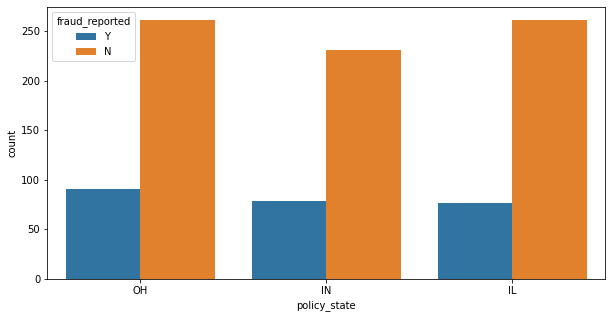

250/500     351
100/300     349
500/1000    300
Name: policy_csl, dtype: int64


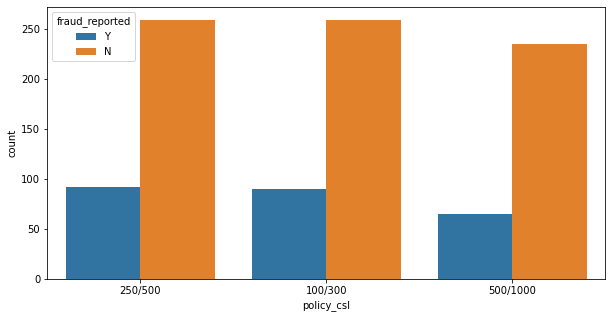

FEMALE    537
MALE      463
Name: insured_sex, dtype: int64


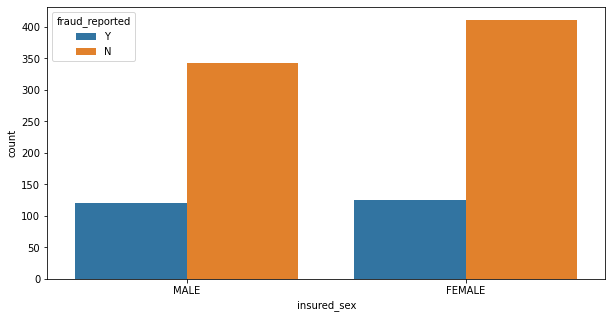

JD             161
High School    160
Associate      145
MD             144
Masters        143
PhD            125
College        122
Name: insured_education_level, dtype: int64


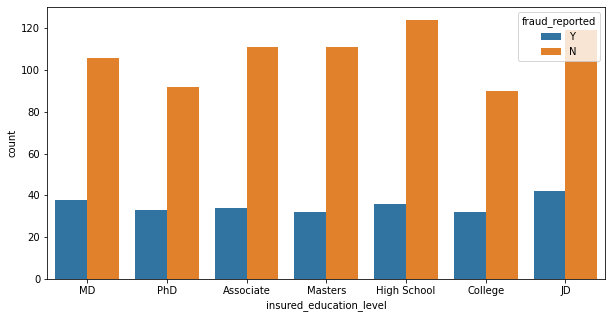

machine-op-inspct    93
prof-specialty       85
tech-support         78
exec-managerial      76
sales                76
craft-repair         74
transport-moving     72
other-service        71
priv-house-serv      71
armed-forces         69
adm-clerical         65
protective-serv      63
handlers-cleaners    54
farming-fishing      53
Name: insured_occupation, dtype: int64


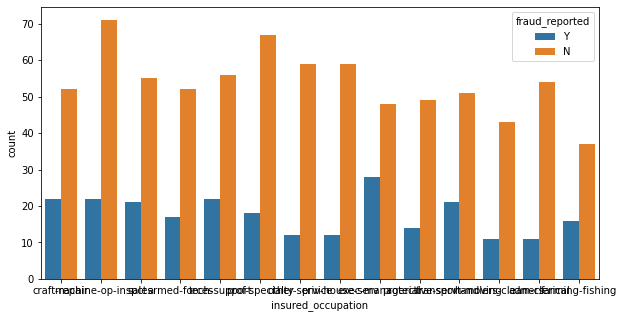

reading           64
paintball         57
exercise          57
bungie-jumping    56
golf              55
camping           55
movies            55
kayaking          54
yachting          53
hiking            52
video-games       50
skydiving         49
base-jumping      49
board-games       48
polo              47
chess             46
dancing           43
sleeping          41
cross-fit         35
basketball        34
Name: insured_hobbies, dtype: int64


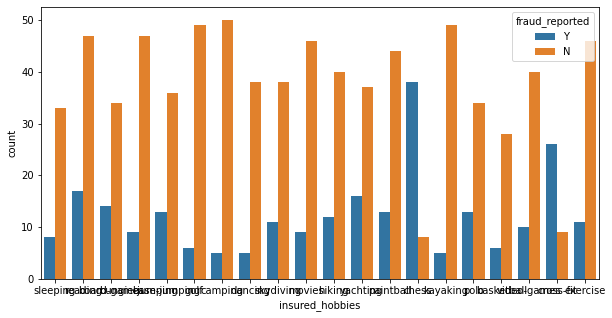

own-child         183
other-relative    177
not-in-family     174
husband           170
wife              155
unmarried         141
Name: insured_relationship, dtype: int64


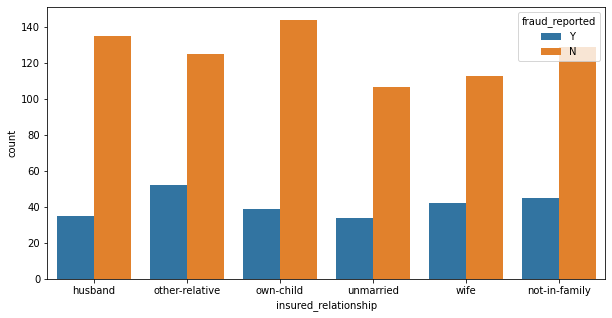

Multi-vehicle Collision     419
Single Vehicle Collision    403
Vehicle Theft                94
Parked Car                   84
Name: incident_type, dtype: int64


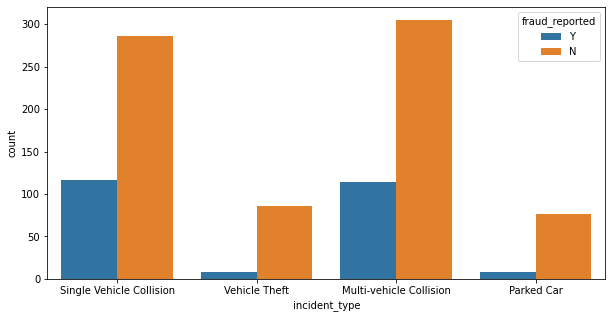

Rear Collision     470
Side Collision     276
Front Collision    254
Name: collision_type, dtype: int64


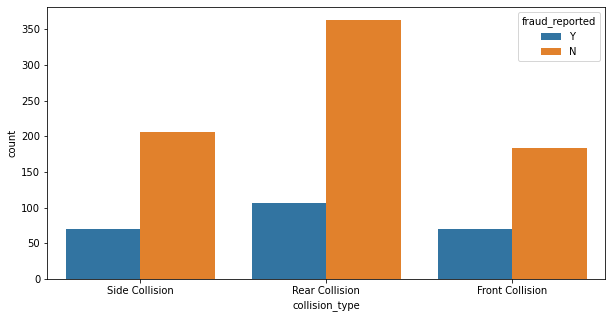

Minor Damage      354
Total Loss        280
Major Damage      276
Trivial Damage     90
Name: incident_severity, dtype: int64


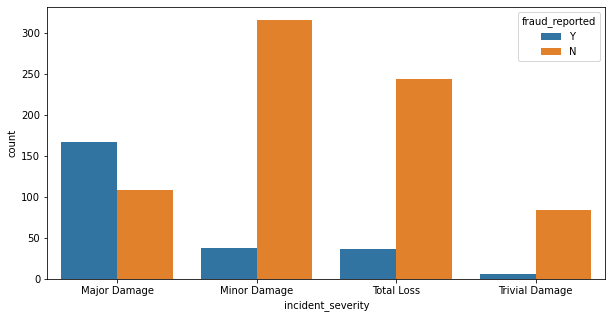

Police       292
Fire         223
Other        198
Ambulance    196
None          91
Name: authorities_contacted, dtype: int64


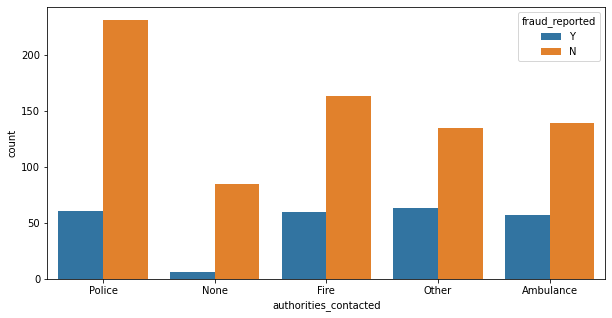

NY    262
SC    248
WV    217
VA    110
NC    110
PA     30
OH     23
Name: incident_state, dtype: int64


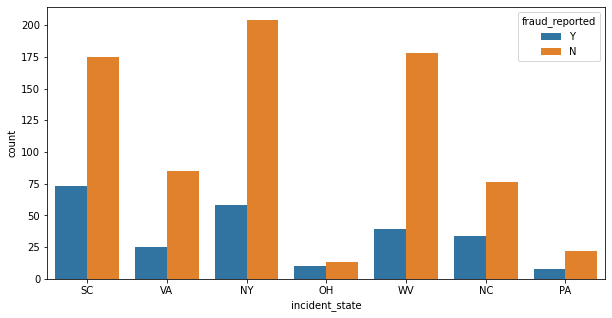

Springfield    157
Arlington      152
Columbus       149
Northbend      145
Hillsdale      141
Riverwood      134
Northbrook     122
Name: incident_city, dtype: int64


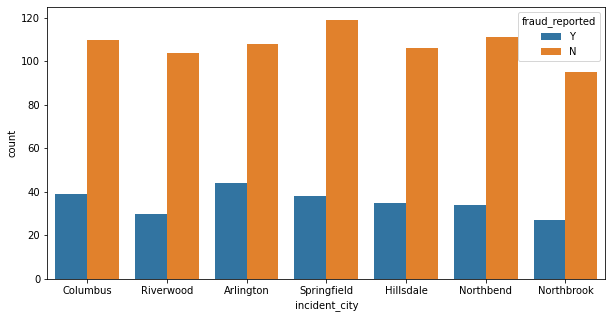

NO     698
YES    302
Name: property_damage, dtype: int64


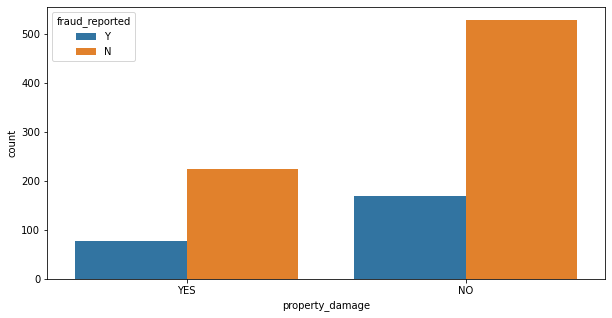

NO     686
YES    314
Name: police_report_available, dtype: int64


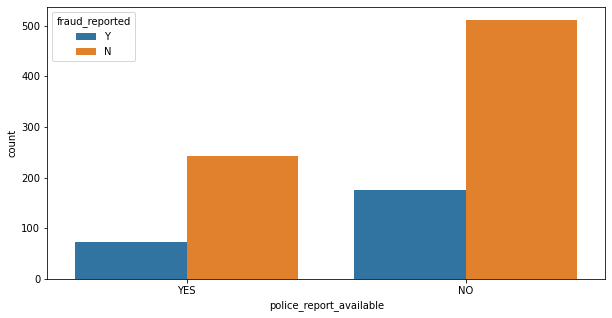

Suburu        80
Dodge         80
Saab          80
Nissan        78
Chevrolet     76
BMW           72
Ford          72
Toyota        70
Audi          69
Accura        68
Volkswagen    68
Jeep          67
Mercedes      65
Honda         55
Name: auto_make, dtype: int64


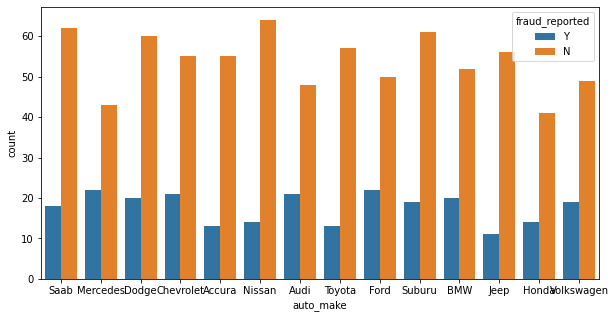

N    753
Y    247
Name: fraud_reported, dtype: int64


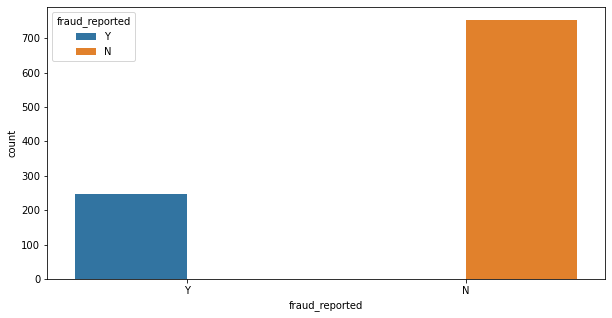

In [25]:
cat=[]
for i in df.columns:
    if df[i].dtypes == 'object':
        cat.append(i)
for i in cat:
    plt.figure(figsize=(10,5))
    sns.countplot(x=i, hue='fraud_reported', data=df)
    print(df[i].value_counts())
    plt.show()

Let us now encode just the output column to do further visualisation.



In [26]:
from sklearn.preprocessing import OrdinalEncoder
enc=OrdinalEncoder()
df['fraud_reported']=enc.fit_transform(df['fraud_reported'].values.reshape(-1,1))

In [27]:
df

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,...,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_year,fraud_reported
0,328,48,OH,250/500,1000,1406.91,0,466132,MALE,MD,...,1,2,YES,71610,6510,13020,52080,Saab,2004,1.0
1,228,42,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,...,0,0,NO,5070,780,780,3510,Mercedes,2007,1.0
2,134,29,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,...,2,3,NO,34650,7700,3850,23100,Dodge,2007,0.0
3,256,41,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,...,1,2,NO,63400,6340,6340,50720,Chevrolet,2014,1.0
4,228,44,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,...,0,1,NO,6500,1300,650,4550,Accura,2009,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,OH,500/1000,1000,1310.80,0,431289,FEMALE,Masters,...,0,1,NO,87200,17440,8720,61040,Honda,2006,0.0
996,285,41,IL,100/300,1000,1436.79,0,608177,FEMALE,PhD,...,2,3,NO,108480,18080,18080,72320,Volkswagen,2015,0.0
997,130,34,OH,250/500,500,1383.49,3000000,442797,FEMALE,Masters,...,2,3,YES,67500,7500,7500,52500,Suburu,1996,0.0
998,458,62,IL,500/1000,2000,1356.92,5000000,441714,MALE,Associate,...,0,1,YES,46980,5220,5220,36540,Audi,1998,0.0


1 - Yes

0 - No

In [28]:
df.columns

Index(['months_as_customer', 'age', 'policy_state', 'policy_csl',
       'policy_deductable', 'policy_annual_premium', 'umbrella_limit',
       'insured_zip', 'insured_sex', 'insured_education_level',
       'insured_occupation', 'insured_hobbies', 'insured_relationship',
       'capital-gains', 'capital-loss', 'incident_type', 'collision_type',
       'incident_severity', 'authorities_contacted', 'incident_state',
       'incident_city', 'number_of_vehicles_involved', 'property_damage',
       'bodily_injuries', 'witnesses', 'police_report_available',
       'total_claim_amount', 'injury_claim', 'property_claim', 'vehicle_claim',
       'auto_make', 'auto_year', 'fraud_reported'],
      dtype='object')

<Figure size 720x360 with 0 Axes>

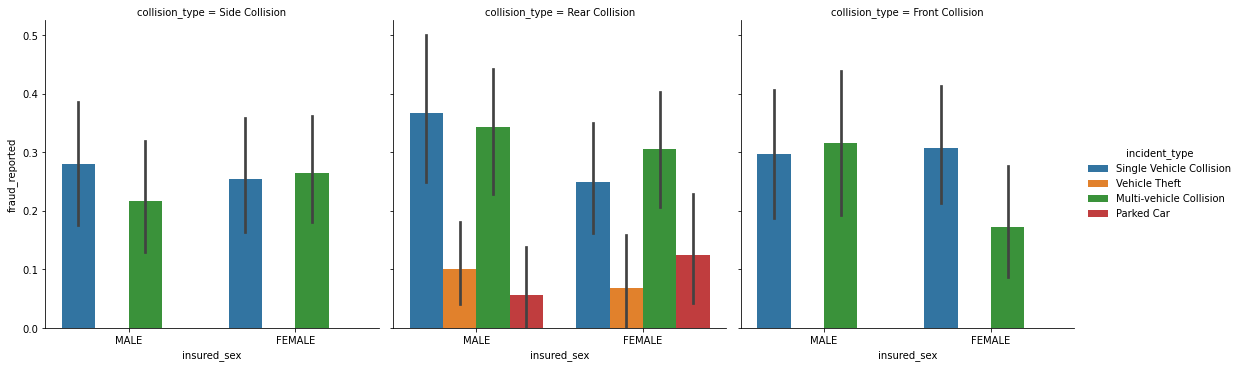

In [29]:
plt.figure(figsize=(10,5))
sns.catplot(x='insured_sex',y='fraud_reported',kind='bar',data=df,col='collision_type',hue='incident_type')

For side collision, we have more males reporting for fraud however moving to others females are more tentative to take fraud claim for rear and Front collision.

In [30]:
sns.catplot?

<AxesSubplot:xlabel='months_as_customer', ylabel='insured_sex'>

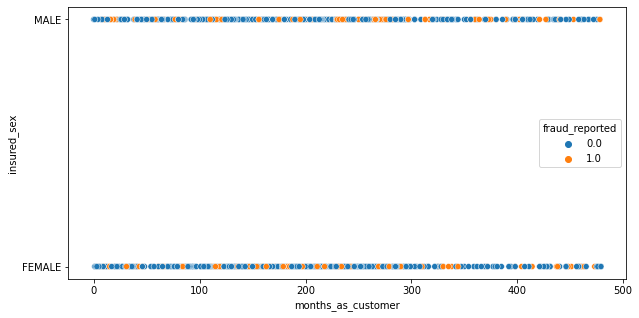

In [31]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='months_as_customer', y='insured_sex',data=df, hue='fraud_reported')

<AxesSubplot:xlabel='insured_education_level', ylabel='insured_relationship'>

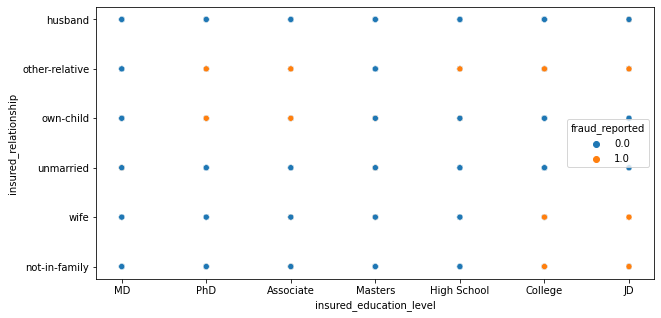

In [32]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='insured_education_level', y='insured_relationship',data=df, hue='fraud_reported')

Basically we can take an intution that people making more claim are dependant to other relative.

1    581
3    358
4     31
2     30
Name: number_of_vehicles_involved, dtype: int64


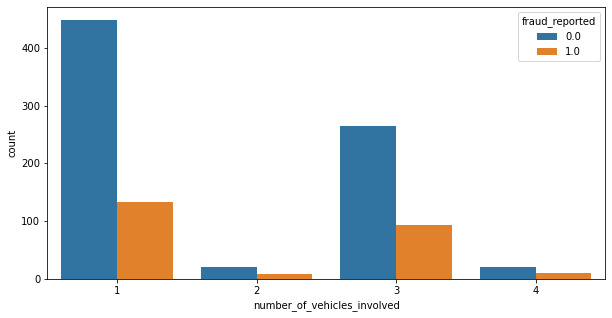

In [33]:
plt.figure(figsize=(10,5))
sns.countplot(x='number_of_vehicles_involved', hue='fraud_reported', data=df)
print(df['number_of_vehicles_involved'].value_counts())

1    258
2    250
0    249
3    243
Name: witnesses, dtype: int64


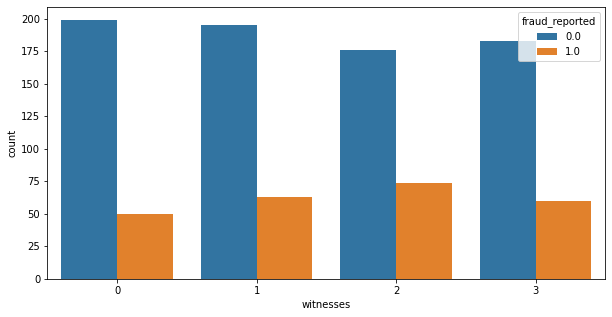

In [34]:
plt.figure(figsize=(10,5))
sns.countplot(x='witnesses', hue='fraud_reported', data=df)
print(df['witnesses'].value_counts())

1995    56
1999    55
2005    54
2006    53
2011    53
2007    52
2003    51
2010    50
2009    50
2013    49
2002    49
2015    47
1997    46
2012    46
2008    45
2014    44
2001    42
2000    42
1998    40
2004    39
1996    37
Name: auto_year, dtype: int64


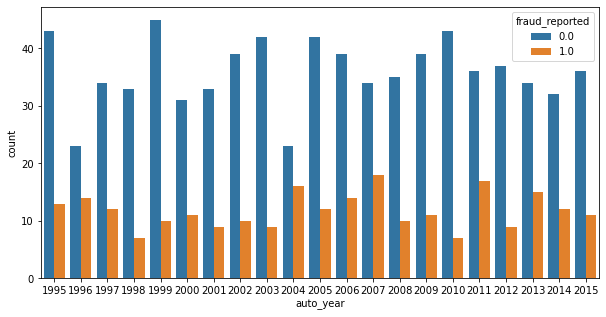

In [35]:
plt.figure(figsize=(10,5))
sns.countplot(x='auto_year', hue='fraud_reported', data=df)
print(df['auto_year'].value_counts())

We see here that at 1995, 99, 2004, 11 the number of fraud claims are more.



NY    262
SC    248
WV    217
VA    110
NC    110
PA     30
OH     23
Name: incident_state, dtype: int64


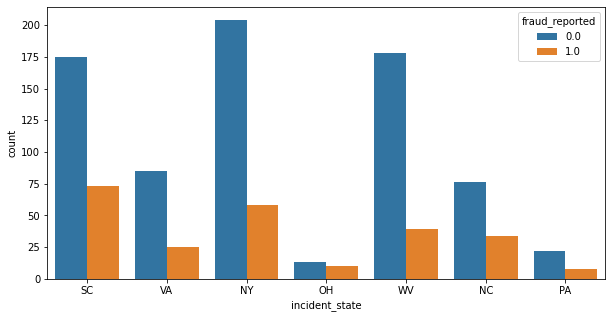

In [36]:
plt.figure(figsize=(10,5))
sns.countplot(x='incident_state', hue='fraud_reported', data=df)
print(df['incident_state'].value_counts())

Springfield    157
Arlington      152
Columbus       149
Northbend      145
Hillsdale      141
Riverwood      134
Northbrook     122
Name: incident_city, dtype: int64


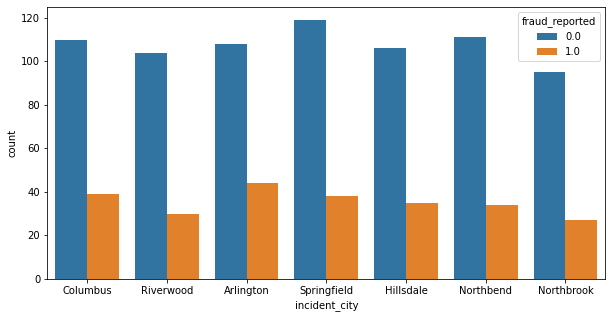

In [37]:
plt.figure(figsize=(10,5))
sns.countplot(x='incident_city', hue='fraud_reported', data=df)
print(df['incident_city'].value_counts())

In all the cities there are almost same number of fraud claims.

<AxesSubplot:>

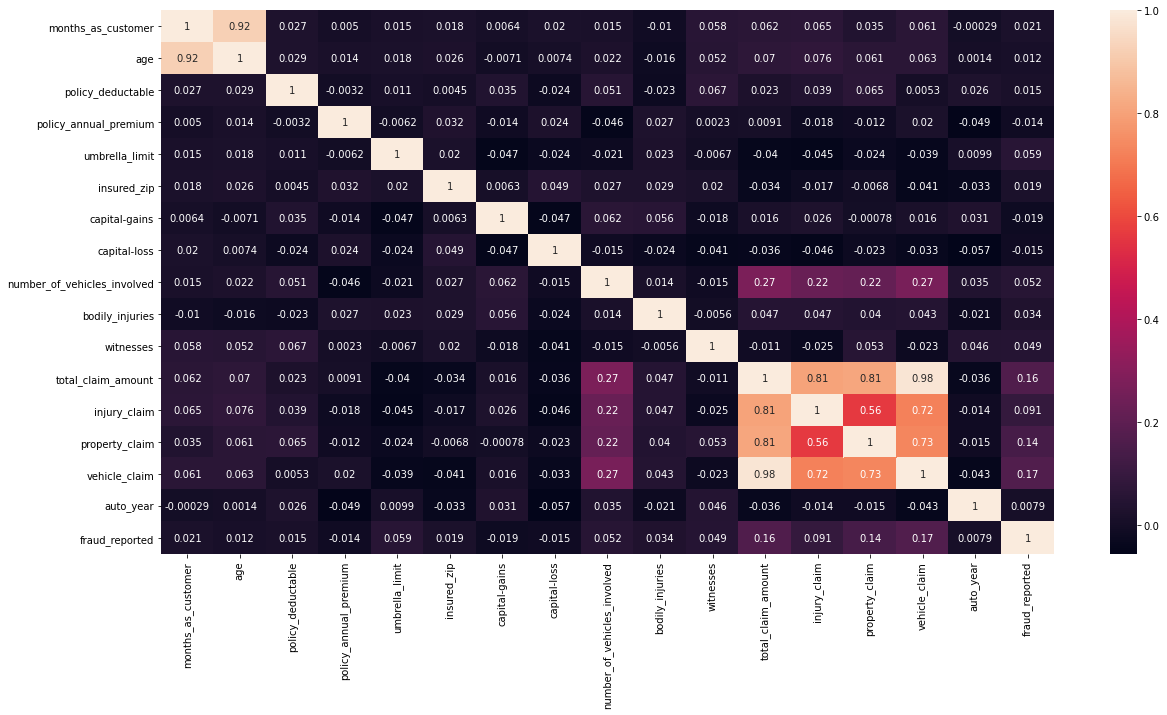

In [38]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), annot=True)

We will remove the other 3 columns and only keep total_claim_amount as it captures the information and removes collinearity.



Proof

In [39]:
t = df['total_claim_amount'].iloc[1]
a = df['vehicle_claim'].iloc[1]
b = df['property_claim'].iloc[1]
c = df['injury_claim'].iloc[1]
print(t)
print(a+b+c)

5070
5070


hence we know that both the columns are the same, we will remove these three columns.



In [40]:
df=df.drop(columns=['vehicle_claim','property_claim','injury_claim', ])

In [41]:
df

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,...,incident_city,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,auto_make,auto_year,fraud_reported
0,328,48,OH,250/500,1000,1406.91,0,466132,MALE,MD,...,Columbus,1,YES,1,2,YES,71610,Saab,2004,1.0
1,228,42,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,...,Riverwood,1,NO,0,0,NO,5070,Mercedes,2007,1.0
2,134,29,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,...,Columbus,3,NO,2,3,NO,34650,Dodge,2007,0.0
3,256,41,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,...,Arlington,1,NO,1,2,NO,63400,Chevrolet,2014,1.0
4,228,44,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,...,Arlington,1,NO,0,1,NO,6500,Accura,2009,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,OH,500/1000,1000,1310.80,0,431289,FEMALE,Masters,...,Northbrook,1,YES,0,1,NO,87200,Honda,2006,0.0
996,285,41,IL,100/300,1000,1436.79,0,608177,FEMALE,PhD,...,Northbend,1,YES,2,3,NO,108480,Volkswagen,2015,0.0
997,130,34,OH,250/500,500,1383.49,3000000,442797,FEMALE,Masters,...,Arlington,3,NO,2,3,YES,67500,Suburu,1996,0.0
998,458,62,IL,500/1000,2000,1356.92,5000000,441714,MALE,Associate,...,Arlington,1,NO,0,1,YES,46980,Audi,1998,0.0


Now we have 30 columns to work with.

In [42]:
df.describe()

,months_as_customer,age,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,auto_year,fraud_reported
count,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000
mean,203.954000,38.948000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,1.83900,0.992000,1.487000,52761.94000,2005.103000,0.247000
std,115.113174,9.140287,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,1.01888,0.820127,1.111335,26401.53319,6.015861,0.431483
min,0.000000,19.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,1.00000,0.000000,0.000000,100.00000,1995.000000,0.000000
25%,115.750000,32.000000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,1.00000,0.000000,1.000000,41812.50000,2000.000000,0.000000
50%,199.500000,38.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,1.00000,1.000000,1.000000,58055.00000,2005.000000,0.000000
75%,276.250000,44.000000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,3.00000,2.000000,2.000000,70592.50000,2010.000000,0.000000
max,479.000000,64.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,4.00000,2.000000,3.000000,114920.00000,2015.000000,1.000000


Though we are able to see few outliers in months as customer, age, policy premium, etc.,

Will see through all the data and try to process them.

In [44]:
#As we have already read the encoder above, we will encode the rest here.

for i in df.columns:
    if df[i].dtypes == 'object':
        df[i] = enc.fit_transform(df[i].values.reshape(-1,1))

Cheaking for Zscore

In [45]:
from scipy.stats import zscore
z=np.abs(zscore(df))
threshold=3
print(np.where(z>3))

(array([ 31,  48,  88, 115, 119, 229, 248, 262, 314, 430, 458, 503, 657,
       700, 763, 807, 875, 922, 975], dtype=int64), array([ 6,  6,  6,  6,  6,  5,  5,  6,  6,  6,  6,  6,  6,  6,  5, 14,  6,
        6,  6], dtype=int64))


In [46]:
dfn = df[(z<3).all(axis=1)]
print(df.shape)
print(dfn.shape)

(1000, 30)
(981, 30)


In [47]:
# percentage of data loss.
data_loss = ((1000-981)/1000)*100
data_loss

1.9

# Splitting


In [48]:
x=dfn.drop(columns='fraud_reported')
y=dfn['fraud_reported']

In [49]:
x.dtypes

months_as_customer               int64
age                              int64
policy_state                   float64
policy_csl                     float64
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                    float64
insured_education_level        float64
insured_occupation             float64
insured_hobbies                float64
insured_relationship           float64
capital-gains                    int64
capital-loss                     int64
incident_type                  float64
collision_type                 float64
incident_severity              float64
authorities_contacted          float64
incident_state                 float64
incident_city                  float64
number_of_vehicles_involved      int64
property_damage                float64
bodily_injuries                  int64
witnesses                        int64
police_report_available  

Now we have all the data in numeric format.

Scaling

In [50]:
x.columns
col=['months_as_customer', 'age', 'policy_state', 'policy_csl',
       'policy_deductable', 'policy_annual_premium', 'umbrella_limit',
       'insured_zip', 'insured_sex', 'insured_education_level',
       'insured_occupation', 'insured_hobbies', 'insured_relationship',
       'capital-gains', 'capital-loss', 'incident_type', 'collision_type',
       'incident_severity', 'authorities_contacted', 'incident_state',
       'incident_city', 'number_of_vehicles_involved', 'property_damage',
       'bodily_injuries', 'witnesses', 'police_report_available',
       'total_claim_amount', 'auto_make', 'auto_year']

In [51]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)

x = pd.DataFrame(x, columns = col)
x

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,...,incident_state,incident_city,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,auto_make,auto_year
0,1.070216,0.984369,1.178383,0.065872,-0.223570,0.621168,-0.467587,-0.485254,1.072994,0.533151,...,0.350869,-0.974643,-0.819388,1.513918,0.001248,0.464781,1.471229,0.716940,0.852529,-0.188317
1,0.204305,0.330788,-0.025777,0.065872,1.413162,-0.246525,1.891997,-0.456624,1.072994,0.533151,...,0.814755,0.990670,-0.819388,-0.660538,-1.222563,-1.333838,-0.679704,-1.809519,0.355601,0.310977
2,-0.609650,-1.085304,1.178383,-1.176823,1.413162,0.646948,1.891997,-0.982496,-0.931972,1.557678,...,-1.040786,-0.974643,1.145942,-0.660538,1.225058,1.364090,-0.679704,-0.686395,-0.638257,0.310977
3,0.446760,0.221858,-1.229938,0.065872,1.413162,0.657707,2.363914,1.503505,-0.931972,1.557678,...,-0.576901,-1.465971,-0.819388,-0.660538,0.001248,0.464781,-0.679704,0.405214,-0.886722,1.475995
4,0.204305,0.548648,-1.229938,1.308566,-0.223570,1.353591,2.363914,1.539768,1.072994,-1.515903,...,-1.040786,-1.465971,-0.819388,-0.660538,-1.222563,-0.434529,-0.679704,-1.755223,-1.632115,0.643839
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
976,-1.743993,-0.104933,1.178383,1.308566,-0.223570,0.223467,-0.467587,-0.973293,-0.931972,1.045414,...,-1.504672,0.499342,-0.819388,1.513918,-1.222563,-0.434529,-0.679704,1.308877,-0.141328,0.144546
977,0.697874,0.221858,-1.229938,-1.176823,-0.223570,0.744811,-0.467587,1.504345,-0.931972,1.557678,...,0.350869,0.008014,-0.819388,1.513918,1.225058,1.364090,-0.679704,2.116858,1.597923,1.642426
978,-0.644287,-0.540653,1.178383,0.065872,-1.041936,0.524257,0.948164,-0.812103,-0.931972,1.045414,...,-1.504672,-1.465971,1.145942,-0.660538,1.225058,1.364090,1.471229,0.560887,1.100994,-1.519765
979,2.195899,2.509392,-1.229938,1.308566,1.413162,0.414311,1.891997,-0.827272,1.072994,-1.515903,...,-1.040786,-1.465971,-0.819388,-0.660538,-1.222563,-0.434529,1.471229,-0.218237,-1.383651,-1.186903


# Modelling

In [52]:
from sklearn.model_selection import train_test_split

In [53]:
x_train, x_test, y_train, y_test=train_test_split(x,y, test_size=.30,random_state=25)

In [54]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [55]:
lr = LogisticRegression()
gnb=GaussianNB()
knc = KNeighborsClassifier()
dtc = DecisionTreeClassifier()
svc = SVC()
rf = RandomForestClassifier()
ada = AdaBoostClassifier()

In [56]:
model=[lr,knc,dtc,svc,rf,ada,gnb]
for m in model:
    print('The model is: ',m)
    m.fit(x_train,y_train)
    predict=m.predict(x_test)
    pred_train=m.predict(x_train)
    print('Accuracy score for the training : ',accuracy_score(y_train,pred_train))
    print('Accuracy score for the model is: ',accuracy_score(y_test,predict))
    print('Calssification Report is: ',classification_report(y_test,predict))
    print('Confusion Matrix is: ',confusion_matrix(y_test,predict))
    print('\n\n')

The model is:  LogisticRegression()
Accuracy score for the training :  0.8134110787172012
Accuracy score for the model is:  0.7694915254237288
Calssification Report is:                precision    recall  f1-score   support

         0.0       0.81      0.91      0.86       224
         1.0       0.53      0.32      0.40        71

    accuracy                           0.77       295
   macro avg       0.67      0.62      0.63       295
weighted avg       0.74      0.77      0.75       295

Confusion Matrix is:  [[204  20]
 [ 48  23]]



The model is:  KNeighborsClassifier()
Accuracy score for the training :  0.8134110787172012
Accuracy score for the model is:  0.7457627118644068
Calssification Report is:                precision    recall  f1-score   support

         0.0       0.77      0.94      0.85       224
         1.0       0.41      0.13      0.19        71

    accuracy                           0.75       295
   macro avg       0.59      0.53      0.52       295
weighted av

# Cross validation.

In [57]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
model = [lr, knc, dtc, svc, rf, ada, gnb]
for m in model:
    print('The model is: \n',m)
    for j in range (2,10):
        train_accuracy = accuracy_score(y_train, pred_train)
        test_accuracy = accuracy_score(y_test, predict)
        cv_score = cross_val_score(m, x, y, cv = j)
        cv_mean = cv_score.mean()
        print(f'At cross fold {j} the cv score is {cv_mean}')
        print('\n\n')

The model is: 
 LogisticRegression()
At cross fold 2 the cv score is 0.7726796624963631



At cross fold 3 the cv score is 0.762487257900102



At cross fold 4 the cv score is 0.7624771859963497



At cross fold 5 the cv score is 0.7675593079871543



At cross fold 6 the cv score is 0.7594393735348396



At cross fold 7 the cv score is 0.7655521783181357



At cross fold 8 the cv score is 0.7625533120085299



At cross fold 9 the cv score is 0.7675840978593274



The model is: 
 KNeighborsClassifier()
At cross fold 2 the cv score is 0.727829502473087



At cross fold 3 the cv score is 0.7247706422018348



At cross fold 4 the cv score is 0.7206860793097727



At cross fold 5 the cv score is 0.7298611830519011



At cross fold 6 the cv score is 0.7309279764576787



At cross fold 7 the cv score is 0.7257996815747576



At cross fold 8 the cv score is 0.728858456617353



At cross fold 9 the cv score is 0.726809378185525



The model is: 
 DecisionTreeClassifier()
At cross fold 2 the cv 

# AUC ROC curve.

In [58]:
from sklearn.metrics import roc_curve,roc_auc_score

In [59]:
y_predprob=dtc.predict_proba(x_test)[:,1]

In [60]:
fpr,tpr,thresholds=roc_curve(y_test,y_predprob)

In [61]:
fpr

array([0.        , 0.14732143, 1.        ])

In [62]:
tpr

array([0.        , 0.67605634, 1.        ])

In [63]:
thresholds

array([2., 1., 0.])

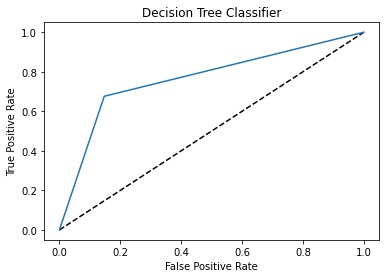

In [64]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Adaboost Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Decision Tree Classifier')
plt.show()

In [65]:
Auc_score=roc_auc_score(y_test,lr.predict(x_test))

In [66]:
Auc_score

0.6173289738430583

# Grid Search

In [67]:
from sklearn.model_selection import GridSearchCV

In [68]:
param = {'criterion':['gini', 'entropy'],'splitter':['best', 'random'],'max_features':['log2','auto','sqrt']}

In [69]:
modeldtr = DecisionTreeClassifier()

In [70]:
grids = GridSearchCV(modeldtr,param,cv=4)

In [71]:
grid_result = grids.fit(x_train, y_train)

In [72]:
print(grids.best_params_)

{'criterion': 'entropy', 'max_features': 'sqrt', 'splitter': 'best'}


In [73]:
print('Best Score: ', grid_result.best_score_)

Best Score:  0.7726353189174486


In [74]:
dtr=DecisionTreeClassifier(criterion='entropy',max_features='auto',splitter='best')

In [75]:
dtr.fit(x_train, y_train)
dtr.score(x_train, y_train)
preddtr = dtr.predict(x_test)
data = [preddtr, y_test]
pd.DataFrame(data, index = ['Predicted', 'Actual'])

,0,1,2,3,4,5,6,7,8,9,...,285,286,287,288,289,290,291,292,293,294
Predicted,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
Actual,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [76]:
print('Errors:')
print('\n')
print('Accuracy score for the training : ',accuracy_score(y_train,pred_train))
print('Accuracy score for the model is: ',accuracy_score(y_test,predict))
print('Calssification Report is: ',classification_report(y_test,predict))
print('Confusion Matrix is: ',confusion_matrix(y_test,predict))
print('\n\n')

Errors:


Accuracy score for the training :  0.7798833819241983
Accuracy score for the model is:  0.7661016949152543
Calssification Report is:                precision    recall  f1-score   support

         0.0       0.83      0.87      0.85       224
         1.0       0.52      0.44      0.47        71

    accuracy                           0.77       295
   macro avg       0.67      0.65      0.66       295
weighted avg       0.75      0.77      0.76       295

Confusion Matrix is:  [[195  29]
 [ 40  31]]





In [77]:
import joblib

In [78]:
joblib.dump(lr,'Insurancedtr.obj')

['Insurancedtr.obj']